# Problem Set 3, due Feb 12 at 10:30am.

In [60]:
# Numpy is a library for working with Arrays
import numpy as np
print("Numpy version:        %6.6s" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print("SciPy version:        %6.6s" % sp.__version__)
import scipy.stats as st

# Pandas makes working with data tables easier
import pandas as pd
print("Pandas version:       %6.6s" % pd.__version__)

# Module for plotting
import matplotlib 
print("Maplotlib version:    %6.6s" % matplotlib.__version__)
%matplotlib inline
# needed for inline plots in notebooks
import matplotlib.pyplot as plt  

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print("Scikit-Learn version: %6.6s" % sklearn.__version__)
import statsmodels.formula.api as smf
import statsmodels.api as sm

Numpy version:        1.13.3
SciPy version:        0.19.1
Pandas version:       0.20.3
Maplotlib version:     2.1.0
Scikit-Learn version: 0.19.1


## Introduction to the assignment

For this assignment, you will be using data from the [Progresa
program](http://en.wikipedia.org/wiki/Oportunidades), a government
social assistance program in Mexico. This program, as well as the
details of its impact, are described in the paper "[School subsidies
for the poor: evaluating the Mexican Progresa poverty
program](http://www.sciencedirect.com/science/article/pii/S0304387803001858)",
by Paul Shultz (available on Canvas).  The data
(progresa_sample.csv.gz) is available on canvas
in files/data.

Please read the paper to familiarize yourself with
the PROGRESA program before beginning this problem set, so you have a
rough sense of where the data come from and how they were
generated. If you just proceed into the problem set without
understanding Progresa or the data, it will be very difficult!

The goal of this problem set is to implement some of the basic
econometric techniques that you are learning in class to measure the
impact of Progresa on secondary school enrollment rates. The timeline
of the program was:

 * Baseline survey conducted in 1997
 * Intervention begins in 1998, "Wave 1" of data collected in 1998
 * "Wave 2 of data" collected in 1999
 * Evaluation ends in 2000, at which point the control villages were treated. 
 
When you are ready, download the progresa_sample.csv data from
Canvas. The data are actual data collected to evaluate the impact of
the Progresa program.  In this file, each row corresponds to an
observation taken for a given child for a given year. There are two
years of data (1997 and 1998), and just under 40,000 children who are
surveyed in both years.  For each child-year observation, the
following variables are collected:

| Variable name | Description|
|------|------|
|year	  |year in which data is collected
|sex	  |male = 1|
|indig	  |indigenous = 1|
|dist_sec |nearest distance to a secondary school|
|sc	      |enrolled in school in year of survey|
|grc      |grade enrolled|
|fam_n    |family size|
|min_dist |	min distance to an urban center|
|dist_cap |	min distance to the capital|
|poor     |	poor = "pobre"|
|progresa |treatment = "basal"|
|hohedu	  |years of schooling of head of household|
|hohwag	  |monthly wages of head of household|
|welfare_index|	welfare index used to classify poor|
|hohsex	|gender of head of household (male=1)|
|hohage	|age of head of household|
|age	|years old|
|folnum	|individual id|
|village|	village id|
|sc97	|schooling in 1997|


## Part 1: Descriptive analysis

### 1.1	Summary Statistics

Report summary statistics (mean, standard deviation, and number of missings) for all of
the demographic variables in the dataset (i.e., everything except
year, folnum, village).  Present the actual levels for 'progresa' and
'poor'.  Do these fit with the documentation above?

Present these in a single table alphabetized
by variable name. Do NOT simply expect the grader to scroll through
your output!

In [61]:
# Load in data
df = pd.DataFrame.from_csv('progresa_sample.csv', header=0, index_col=None)
# Convert progresa and poor columns to booleans 0 and 1
df['progresa'] = (df['progresa'] == 'basal').astype(int)
df['poor'] = (df['poor'] == 'pobre').astype(int)

In [62]:
# Mean
means = df[['sex', 'indig', 'dist_sec', 'sc', 'grc', 'fam_n', 'min_dist', 'dist_cap', 'poor', 'progresa', 'hohedu', 'welfare_index', 'hohsex', 'hohage', 'age', 'sc97']].mean()

# Standard deviation
std = df[['sex', 'indig', 'dist_sec', 'sc', 'grc', 'fam_n', 'min_dist', 'dist_cap', 'poor', 'progresa', 'hohedu', 'welfare_index', 'hohsex', 'hohage', 'age', 'sc97']].std()

# Number of missing
missing = df[['sex', 'indig', 'dist_sec', 'sc', 'grc', 'fam_n', 'min_dist', 'dist_cap', 'poor', 'progresa', 'hohedu', 'welfare_index', 'hohsex', 'hohage', 'age', 'sc97']].isnull().sum()

In [63]:
# Create summary statistics table
dfDemo = pd.DataFrame(data={'mean': means, 'std': std, 'missing': missing})
dfDemo

,mean,missing,std
sex,0.512211,24,0.499854
indig,0.298324,300,0.457525
dist_sec,2.418910,0,2.234109
sc,0.819818,8453,0.384342
grc,3.963537,6549,2.499063
fam_n,7.215715,0,2.352900
min_dist,103.447520,0,42.089441
dist_cap,147.674452,0,76.063134
poor,0.846498,0,0.360473
progresa,0.615663,0,0.486441


### 1.2 Differences at baseline?

Are the baseline (1997) demographic characteristics **for the poor**
different in treatment and control villages? Hint: Use a T-Test to
determine whether there is a statistically significant difference in
the average values of each of the variables in the dataset. Focus only
on the data from 1997 for individuals who are poor (i.e.,
poor=='pobre').

Present your results in a single table with the following columns and 14 (or so) rows:

| Variable name | Average value (Treatment villages) | Average value (Control villages) | Difference (Treat - Control) | p-value |
|------|------|------|------|------|
|Male|?|?|?|?|


In [79]:
# your code here
variables = ['sex', 'indig', 'dist_sec', 'sc', 'grc', 'fam_n', 'min_dist', 'dist_cap', 'hohedu', 'welfare_index', 'hohsex', 'hohage', 'age', 'sc97']
columns = ['Variable name', 'Average value (Treatment villages)', 'Average value (Control villages)', 'Difference (Treat - Control)', 'p-value']
df97poor = df[(df['year'] == 97) & (df['poor'] == 1)]

treatment = df97poor[(df97poor['progresa'] == 1)]
control = df97poor[df97poor['progresa'] == 0]

dfResults = pd.DataFrame(columns=columns)

for var in variables:
    ttest = st.ttest_ind(treatment.dropna()[var], control.dropna()[var])
    dfTemp = pd.DataFrame([[var, treatment[var].mean(), control[var].mean(), ttest[0], ttest[1]]], columns=columns)
    dfResults = pd.concat([dfResults, dfTemp], ignore_index=True)

dfResults

,Variable name,Average value (Treatment villages),Average value (Control villages),Difference (Treat - Control),p-value
0,sex,0.519317,0.505052,2.334621,1.956962e-02
1,indig,0.325986,0.332207,-1.561670,1.183760e-01
2,dist_sec,2.453122,2.507662,-0.041252,9.670949e-01
3,sc,0.822697,0.815186,1.689261,9.117959e-02
4,grc,3.531599,3.543050,-0.851002,3.947750e-01
5,fam_n,7.281327,7.302469,-0.800187,4.236088e-01
6,min_dist,107.152915,103.237854,8.766462,1.936661e-18
7,dist_cap,150.829074,153.769730,-2.927983,3.414194e-03
8,hohedu,2.663139,2.590348,2.224346,2.613239e-02
9,welfare_index,655.428377,659.579100,-3.559301,3.724043e-04


### 1.3 Interpretation

* A: Are there statistically significant differences between treatment and control villages as baseline? 
* B: Why does it matter if there are differences at baseline?
* C: What does this imply about how to measure the impact of the treatment?

*Discuss your results here*
A. There are statistically significant differences between treatment and control villages where variables are:
- sex
    - p-value .01956962 < 0.05
    - Significant
- min_dist
    - p-value 1.936661e-18 < 0.05
    - Very significant
- dist_cap
    - p-value .003414194 < 0.05
    - Very significant
- hohedu
    - p-value .02613239 < 0.05
    - Significant
- welfare_index
    - p-value 3.724043e-04 < 0.05
    - Very significant
- hohage
    - p-value 1.925767e-06 < 0.05
    - Very significant

B. If there are differences at baseline, that means that the Progresa program made statistically significant impact in at least some demographics. Otherwise, the program made no impact whatsoever.

C. This implies we should expect to see significant changes in the variables list above in later years.

### 1.4 Graphical exploration, part 1

For each level of household head education, compute the average
enrollment rate in 1997. Create a scatterplot that shows this
relationship. What do you notice?

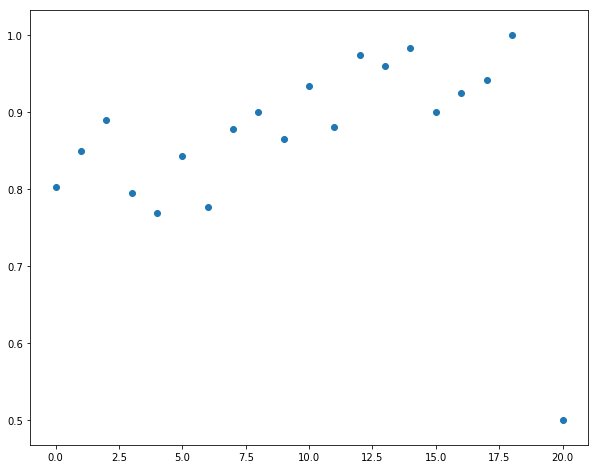

In [184]:
# Your code here
df97 = df[(df['year'] == 97)]

plt.figure(figsize=(10,8))
plt.scatter(df97['hohedu'].unique(), df97.groupby('hohedu')['sc'].mean(), marker='o') 

*Discuss your results here*

The general trend looks like the more education the head of household has, the higher the enrollment in school. 

However, there is one outlier. Head of household with 20 years of education has a very low rate of enrollment in school that year. However, this can be due to lack of people who fit that demographic and may not have many children or their children are already past school age.

### 1.5 Graphical exploration, part 2

Create a histogram of village enrollment rates **among poor households
in treated villages**, before and after treatment.  Specifically, for
each village, calculate the average rate of enrollment of poor
households in treated villages in 1997, then compute the average rate
of enrollment of poor households in treated villages in 1998. Create
two separate histograms showing the distribution of these average
enrollments rates, one histogram for 1997 and one histogram for
1998. On each histogram, draw a vertical line that intersects the
x-axis at the average value (across all households). Does there appear
to be a difference? Is this difference statistically significant?

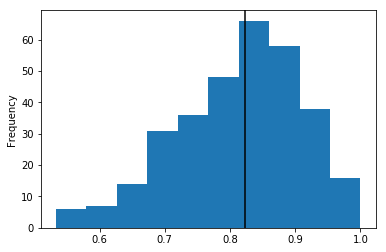

In [135]:
# Poor, treated households in 1997
dfPoorTreated97 = df[(df['year'] == 97) & (df['poor'] == 1) & (df['progresa'] == 1)]
histPoorTreated97 = dfPoorTreated97.groupby('village')['sc'].mean().plot(kind='hist')

# Calculate average and plot
avg97 = dfPoorTreated97['sc'].mean()
plt.axvline(avg97, color='k', linestyle='-')

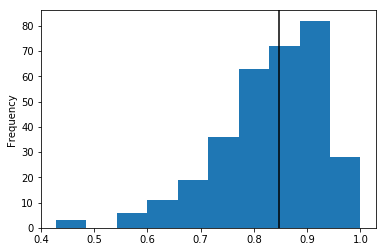

In [119]:
# Poor, treated households in 1998
dfPoorTreated98 = df[(df['year'] == 98) & (df['poor'] == 1) & (df['progresa'] == 1)]
histPoorTreated98 = dfPoorTreated98.groupby('village')['sc'].mean().plot(kind='hist')

# Calculate average and plot
avg98 = dfPoorTreated98['sc'].mean()
plt.axvline(avg98, color='k', linestyle='-')

In [133]:
# Is difference statistically different?
st.ttest_ind(dfPoorTreated97.groupby('village')['sc'].mean(), dfPoorTreated98.groupby('village')['sc'].mean())

# Result: pvalue = 0.04424870036572115

Ttest_indResult(statistic=-2.0157134865156379, pvalue=0.04424870036572115)

*Discuss your results here*

The difference between the average enrollment rate across households in 1997 and in 1998 is statistically significant. The p-value is 0.044, which is lower than the p-value threshold 0.05.

Reject null hypothesis. Progresa made a statistically significant difference in enrollment in treated households.

## Part 2: Measuring Impact

Our goal is to estimate the causal impact of the PROGRESA program on
the social and economic outcomes of individuals in Mexico. We will
focus on the impact of the program on the poor (those with
poor=='pobre'), since only the poor were eligible to receive the
PROGRESA assistance.

### 2.1 Simple differences: T-test

Begin by estimating the impact of Progresa using "simple differences."
Restricting yourself to data from 1998 (after treatment), calculate
the average enrollment rate among **poor** households in the Treatment
villages and the average enrollment rate among **poor** households in
the control villages. Use a t-test to determine if this difference is
statistically significant. What do you conclude?

In [136]:
# Your code here
mean98Treated = df[(df['year'] == 98) & (df['poor'] == 1) & (df['progresa'] == 1)].groupby('village')['sc'].mean()
mean98Control = df[(df['year'] == 98) & (df['poor'] == 1) & (df['progresa'] == 0)].groupby('village')['sc'].mean()

st.ttest_ind(mean98Treated, mean98Control)

# pvalue = 0.011905294137542672

Ttest_indResult(statistic=2.5241266257746298, pvalue=0.011905294137542672)

*Discuss your results here*

The difference in average enrollment rate between treatment and control villages in 1998 is statistically significant. The p-value is 0.0119, which is significantly lower than the p-value threshold 0.05.

Reject null hypothesis. Progresa made a statistically significant difference in enrollment.

### 2.2 Simple differences: Regression

Estimate the effects of Progresa on enrollment using a regression
model, by regressing the 1998 enrollment rates **of the poor** on
treatment assignment.  Do not include any additional control
variables.
Discuss the following:

* Based on this model, how much did Progresa increase the likelihood of a child enrolling?
* How does your regression estimate compare to your t-test estimate from part 2.1?
* Based on this regression model, can we reject the null hypothesis that the treatment effects are zero? 
* What is the counterfactual assumption underlying this regression?

Note: I recommend to use statsmodels.formula.api as this allows to use
convenient R-style formulas and provedes nice summaries of the results.

In [139]:
# Your code here
df98 = df[(df['year'] == 98) & (df['poor'] == 1)]

lm98 = smf.ols(formula = 'sc ~ progresa', data = df98).fit()
print(lm98.summary())

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     69.87
Date:                Thu, 08 Feb 2018   Prob (F-statistic):           6.64e-17
Time:                        17:42:34   Log-Likelihood:                -11926.
No. Observations:               27450   AIC:                         2.386e+04
Df Residuals:                   27448   BIC:                         2.387e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8076      0.004    220.676      0.0

*Discuss your results here*

The coefficient is positive, which means that the program made a positive impact on enrollment (i.e. enrollment increased). The coefficient is 0.0388. I would interpret this to mean that Progresa increases the likelihood of a child being enrolled by about 4%.

The t-statistic from t-test in 2.1 was 2.52. The t-statistic here is 8.359.

P-value is 0.00, which means we reject the null hypothesis because it is less than 0.05. The difference in enrollment between treated and control households/villages is statistically significant.

In other words, we reject the null hypothesis that the treatment effects are zero.

The counterfactual assumption underlying this regression is the null hypothesis that the treatment effects are zero.



### 2.3 Multiple Regression

Re-run the above regression estimated but this time include a set of
relevant control variables. Include, for instance, age, distance to a secondary
school, gender, education of household head, welfare index,
indigenous, etc.

* How do the controls affect the point estimate of treatment effect?
* How do the controls affect the standard error on the treatment effect? 
* How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?

In [155]:
# Your code here
variables = ['sex', 'indig', 'dist_sec', 'grc', 'fam_n', 'min_dist', 'dist_cap', 'hohedu', 'welfare_index', 'hohsex', 'hohage', 'age', 'sc97', 'progresa']
df98 = df[(df['year'] == 98) & (df['poor'] == 1)]

df98.dropna(inplace=True)

lm98 = sm.OLS(df98['sc'], sm.add_constant(df98[variables])).fit()
lm98.summary()

/Users/kathryn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     1523.
Date:                Thu, 08 Feb 2018   Prob (F-statistic):               0.00
Time:                        18:05:03   Log-Likelihood:                -3405.8
No. Observations:               26155   AIC:                             6842.
Df Residuals:                   26140   BIC:                             6964.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.8092      0.020     39.795      0.000       0.769       0.849
sex               0.0162      0.003      4.740      0.000       0.010       0.023
indig             0.0117      0.004      2.794      0.005       0.004       0.020
dist_sec         -0.0049      0.001     -5.944      0.000      -0.006      -0.003
grc               0.0172      0.001     12.146      0.000       0.014       0.020
fam_n             0.0007      0.001      0.848      0.397      -0.001       0.002
min_dist          0.0002   5.63e-05      3.808      0.000       0.000       0.000
dist_cap          0.0001   3.26e-05      3.802      0.000       6e-05       0.000
hohedu            0.0035      0.001      4.527      0.000       0.002       0.005
welfare_index -1.598e-05   1.61e-05     -0.995      0.320   -4.75e-05    1.55e-05
hohsex            0.0126      0.007      1.850      0.064      -0.001       0.026
hohage        -8.007e-05      0.000     -0.460      0.646      -0.000       0.000
age              -0.0497      0.001    -39.602      0.000      -0.052      -0.047
sc97              0.5074      0.006     84.951      0.000       0.496       0.519
progresa          0.0328      0.004      9.275      0.000       0.026       0.040
==============================================================================
Omnibus:                     6079.450   Durbin-Watson:                   1.772
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21071.903
Skew:                          -1.154   Prob(JB):                         0.00
Kurtosis:                       6.743   Cond. No.                     8.40e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

*Discuss your results here*

Without controls...
- Point estimate is: 0.0388
- Standard error is: 0.005
- P-value is: 0.000

With controls...
- Point estimate is: 0.0328
- Standard error is: 0.004
- P-value is: 0.000

With controls, point estimate and standard error are slightly lower. However, t-statistic is higher with controls (9.275 > 8.359). P-value is the same (0.00)



!!! I don't understand what point estimate is.

### 2.4 Difference-in-Difference, version 1 (tabular)

Thus far, we have computed the effects of Progresa by estimating the
difference in 1998 enrollment rates across villages. An alternative
approach would be to compute the treatment effect using a
difference-in-differences framework.

Begin by estimating the average treatment effects of the program for poor households using data from 1997 and 1998. Specifically, calculate:

a) the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages

b) the difference (between 1997 and 1998) in enrollment rates among poor households in control villages.

c) The difference between these two differences is your estimate.

* What is your estimate of the impact, and how does it compare to your earlier (simple difference) results?

* What is the counterfactual assumption underlying this estimate? 


In [185]:
# Your code here
# a

meanPoorTreated97 = (df[(df['year'] == 97) & (df['poor'] == 1) & (df['progresa'] == 1)])['sc'].mean()
meanPoorTreated98 = (df[(df['year'] == 98) & (df['poor'] == 1) & (df['progresa'] == 1)])['sc'].mean()

difTreated = meanPoorTreated98 - meanPoorTreated97

# b

meanPoorControl97 = (df[(df['year'] == 97) & (df['poor'] == 1) & (df['progresa'] == 0)])['sc'].mean()
meanPoorControl98 = (df[(df['year'] == 98) & (df['poor'] == 1) & (df['progresa'] == 0)])['sc'].mean()

difControl = meanPoorControl98 - meanPoorControl97

# c

print(difTreated) # 0.023782233992046597
print(difControl) # -0.007549046327276487
estimate = difTreated - difControl

print(estimate) # 0.031331280319323085

0.023782233992046597
-0.007549046327276487
0.031331280319323085


*Discuss your results here*

Estimate of the impact is 0.031. The simple difference was 0.0388.

The estimate of the impact here is very similar, but just slightly lower than the simple difference (0.031 < 0.0388).

The counterfactual assumption underlying this estimate is the null hypothesis that there is no difference in 1998 enrollment rates across villages.

### 2.5 Difference-in-Difference, version 2 (regression)

Now use a regression specification to estimate the average treatment
effects of the program in a difference-in-differences
framework. Include at least 5 control variables.

* What is your estimate of the impact of Progresa? Be very specific in
  interpreting your coefficients and standard errors, and make sure to
  specify exactly what units you are measuring and estimating.

* How do these estimates of the treatment effect compare to the
  estimates based on the simple difference?

* How do these estimates compare to the difference-in-difference
  estimates from 2.4 above? What accounts for these differences?

* What is the counterfactual assumption underlying this regression? 

In [197]:
# Your code here
# a
dfPoorTreated97 = df[(df['year'] == 97) & (df['poor'] == 1) & (df['progresa'] == 1)]
dfPoorTreated98 = df[(df['year'] == 98) & (df['poor'] == 1) & (df['progresa'] == 1)]

lmPoorTreated97 = smf.ols('sc ~ sex + age + hohedu + welfare_index + grc + progresa',
                          data=dfPoorTreated97).fit()
lmPoorTreated98 = smf.ols('sc ~ sex + age + hohedu + welfare_index + grc + progresa',
                          data=dfPoorTreated98).fit()

print(lmPoorTreated97.summary())
print(lmPoorTreated98.summary())

difTreated = lmPoorTreated98.params[1] - lmPoorTreated97.params[1]

print(difTreated) # -0.00683886002445

# b

dfPoorControl97 = df[(df['year'] == 97) & (df['poor'] == 1) & (df['progresa'] == 0)]
dfPoorControl98 = df[(df['year'] == 98) & (df['poor'] == 1) & (df['progresa'] == 0)]

lmPoorControl97 = smf.ols('sc ~ sex + age + hohedu + welfare_index + grc + progresa',
                          data=dfPoorControl97).fit()
lmPoorControl98 = smf.ols('sc ~ sex + age + hohedu + welfare_index + grc + progresa',
                          data=dfPoorControl98).fit()

print(lmPoorControl97.summary())
print(lmPoorControl98.summary())

difControl = lmPoorControl98.params[1] - lmPoorControl97.params[1]

print(difControl) # -0.00446939227586

# c

estimate = np.diff([difTreated, difControl])

print(estimate) # 0.00236947


                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     1637.
Date:                Thu, 08 Feb 2018   Prob (F-statistic):               0.00
Time:                        20:03:26   Log-Likelihood:                -5324.2
No. Observations:               19133   AIC:                         1.066e+04
Df Residuals:                   19127   BIC:                         1.071e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.8197      0.009     95.628

/Users/kathryn/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1471: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/Users/kathryn/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/kathryn/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/kathryn/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/kathryn/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


*Discuss your results here*

I am measuring the units: sex, age, hohedu, welfare_index, grc, and progresa.

Estimate of the impact is 0.00236947. The simple difference was 0.0388. The estimate of the impact here is less than the simple difference. 

The estimate of the impact in 2.4 was 0.031. The estimate of the impact here is less than in 2.4. The control variables account for the differences.

The counterfactual assumption underlying this estimate is the null hypothesis that there is no difference in enrollment rates under the Progresa program between 1997 and 1998.

### 2.6 Summary

* Based on all the analysis you have undertaken to date, do you
  believe that Progresa had a causal impact on the enrollment rates of
  poor households in Mexico?  Explain by referring to the methods and
  results above.

*Discuss your results here*

In all the regressions above, I rejected the null hypothesis. Therefore, yes I believe that Progresa had a causal impact on the enrollment rates of poor households in Mexico.

